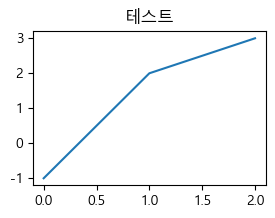

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------
# 한글 폰트 설정
# ---------------------------------------

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))

# ---------------------------------------
# 그래프 전역 크기 설정
# ---------------------------------------
plt.rc('figure', figsize=(12,5))

pass


## 문제 정의
- 산불 발생 현황
- 산불 피해 현황
- 산불 주요 원인

## 데이터 수집

- 산불 발생 및 피해 현황 데이터
    - https://kosis.kr/statHtml/statHtml.do?sso=ok&returnurl=https%3A%2F%2Fkosis.kr%3A443%2FstatHtml%2FstatHtml.do%3Fconn_path%3DMT_ZTITLE%26list_id%3DC_12%26obj_var_id%3D%26seqNo%3D%26tblId%3DTX_13601_A020%26vw_cd%3DMT_ZTITLE%26itm_id%3D%26language%3Dkor%26lang_mode%3Dko%26orgId%3D136%26

## 데이터 프레임 생성

In [56]:
# ----------------------------------------
# 데이터프레임 생성
#  - header : 헤더설정(중첩헤더 설정)
# ----------------------------------------

data_file = 'data/산불데이터/산불피해_현황_20250406123339.csv'

df = pd.read_csv(data_file, 
                 header= [1, 2])

In [57]:
# ----------------------------------------
# 인덱스라벨 설정
#  - 시점
# ----------------------------------------
df.set_index(('시점', '시점'), inplace=True)

In [58]:
# ----------------------------------------
# 데이터프레임 확인
#   - head()
# ----------------------------------------

df.head()

원인 (건)                                                         산불피해  \
             합계 입산자실화 규반소각 논밭두렁소각 쓰레기소각 담뱃불실화 성묘객실화 어린이불장난 건축물화재   기타 건수 (건)   
(시점, 시점)                                                                       
1995        630   312    -    138     -     -    34     18     -  128    630   
1996        527   248    -     73     -     -    38     30     -  138    527   
1997        524   247    -    103    41    29    33     10     -   61    524   
1998        265   104    -     65    24    13    16     11     -   32    265   
1999        315   156    -     57    13    21    20     10     -   38    315   

                                    인명피해 (명)         
          면적 (ha)  재적 (㎥)  피해액 (천원)       합계  사망 부상  
(시점, 시점)                                             
1995      1013.27    5452    450678       26  25  1  
1996      5367.63  363471  13321974       26  24  2  
1997      2329.79   40815   1628712       30  24  6  
1998      1014.00   44092   2516219       16  15  1  
1999       472.79    6377    665661        5   5  -

In [59]:
# ----------------------------------------
# 데이터프레임 확인
#   - tail()
# ----------------------------------------

df.tail()

원인 (건)                                                         산불피해  \
             합계 입산자실화 규반소각 논밭두렁소각 쓰레기소각 담뱃불실화 성묘객실화 어린이불장난 건축물화재   기타 건수 (건)   
(시점, 시점)                                                                       
2020        620   217    -     49    65    75     9      1    54  150    620   
2021        349   133    -     22    27    34    16      3    20   94    349   
2022        756   253    -     44    59    53    14      -    51  282    756   
2023        596   170    -     56    73    56    23      1    41  176    596   
2024        279    49    -     24    28    36     6      1    14  121    279   

                                        인명피해 (명)         
           면적 (ha)   재적 (㎥)    피해액 (천원)       합계 사망  부상  
(시점, 시점)                                                 
2020       2919.84   486459   158140680        7  3   4  
2021        765.89     5641    36124769       14  7   7  
2022      24797.16  2925560  1346275384        8  1   7  
2023       4992.12   464130   285428594       19  3  16  
2024        131.94     5629     9244373        2  -   2

In [60]:
# ----------------------------------------
# 데이터프레임 확인
#   - info()
# ----------------------------------------
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1995 to 2024
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (원인 (건), 합계)      30 non-null     int64  
 1   (원인 (건), 입산자실화)   30 non-null     int64  
 2   (원인 (건), 규반소각)    30 non-null     object 
 3   (원인 (건), 논밭두렁소각)  30 non-null     int64  
 4   (원인 (건), 쓰레기소각)   30 non-null     object 
 5   (원인 (건), 담뱃불실화)   30 non-null     object 
 6   (원인 (건), 성묘객실화)   30 non-null     int64  
 7   (원인 (건), 어린이불장난)  30 non-null     object 
 8   (원인 (건), 건축물화재)   30 non-null     object 
 9   (원인 (건), 기타)      30 non-null     int64  
 10  (산불피해, 건수 (건))    30 non-null     object 
 11  (산불피해, 면적 (ha))   30 non-null     float64
 12  (산불피해, 재적 (㎥))    30 non-null     int64  
 13  (산불피해, 피해액 (천원))  30 non-null     int64  
 14  (인명피해 (명), 합계)    30 non-null     int64  
 15  (인명피해 (명), 사망)    30 non-null     object 
 16  (인명피해 (명), 부상)    30 non-null     object 
dtyp

## 자료형 변환
- 모든 데이터가 숫자형이어야 함
- 데이터타입이 문자열인 컬럼을 모두 찾아서 숫자형으로 변환
- `데이터프레임.select_dtypes(include=자료형)`
    - 특정 자료형을 가진 컬럼 선택
- str 접근자
    - 문자열 컬럼 전처리
    - `컬럼.str.문자열처리함수()`
    - `컬럼.str[인덱싱]`


In [61]:
# ----------------------------------------
#  type이 object인 컬럼라벨
# ----------------------------------------

obj_cols = df.select_dtypes(include='object').columns
obj_cols

MultiIndex([(  '원인 (건)',   '규반소각'),
            (  '원인 (건)',  '쓰레기소각'),
            (  '원인 (건)',  '담뱃불실화'),
            (  '원인 (건)', '어린이불장난'),
            (  '원인 (건)',  '건축물화재'),
            (    '산불피해', '건수 (건)'),
            ('인명피해 (명)',     '사망'),
            ('인명피해 (명)',     '부상')],
           )

In [62]:
# ----------------------------------------
#  '-' 을 0으로 변환한 후 int형으로 변환
# ----------------------------------------

for obj_col in obj_cols:
    df[obj_col] = df[obj_col].str.replace('-', '0')
    df[obj_col] = df[obj_col].astype('int')

In [63]:
# ----------------------------------------
#  확인
# dtypes
# ----------------------------------------
df.dtypes

원인 (건)    합계            int64
          입산자실화         int64
          규반소각          int64
          논밭두렁소각        int64
          쓰레기소각         int64
          담뱃불실화         int64
          성묘객실화         int64
          어린이불장난        int64
          건축물화재         int64
          기타            int64
산불피해      건수 (건)        int64
          면적 (ha)     float64
          재적 (㎥)        int64
          피해액 (천원)      int64
인명피해 (명)  합계            int64
          사망            int64
          부상            int64
dtype: object

## 산불발생현황

#### 연도별 산불 발생 현황

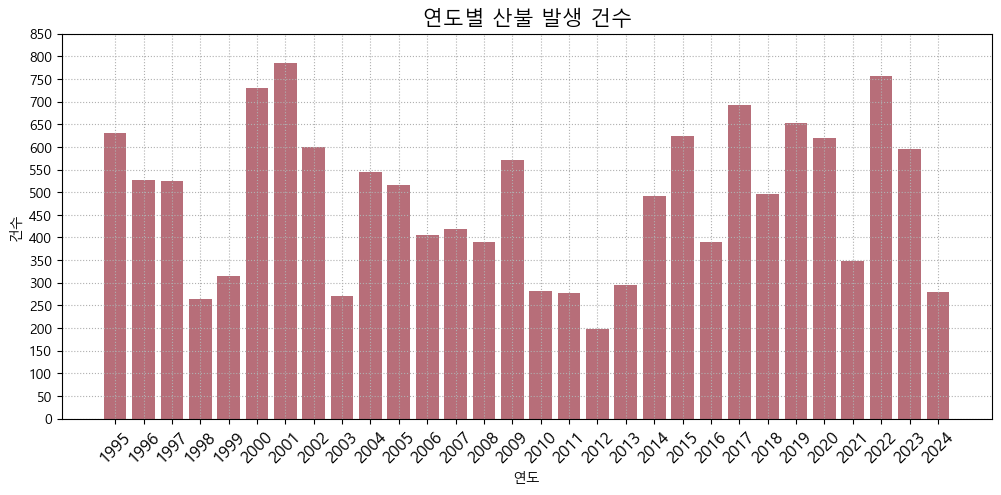

In [64]:
# ----------------------------------------
# 연도별 산불 발생 건수 시각화
# ----------------------------------------

y = df[('원인 (건)', '합계')]
plt.bar(df.index, y, color='#B76E79')
plt.grid(True, ls=':')
plt.xlabel('연도')
plt.ylabel('건수')
plt.title('연도별 산불 발생 건수', fontsize=15)
plt.xticks(range(1995,2025,1), rotation=45, fontsize=12)
plt.yticks(range(0,900,50))
pass


## 산불피해현황

### 연도별 산불 피해 면적

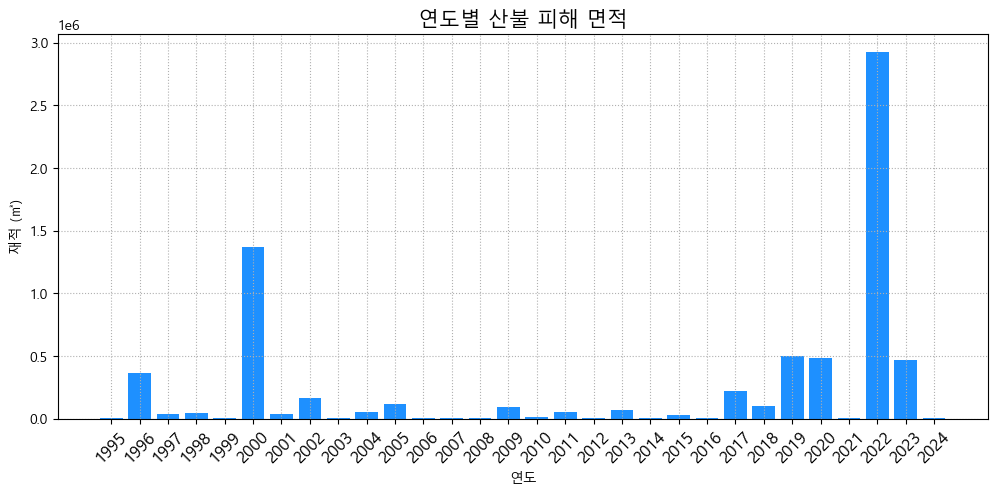

In [65]:
# ----------------------------------------
# 시각화 
# ----------------------------------------

y = df[('산불피해', '재적 (㎥)')]
plt.bar(df.index, y, color='#1E90FF')

plt.grid(True, ls=':')
plt.xlabel('연도')
plt.ylabel('재적 (㎥)')
plt.title('연도별 산불 피해 면적', fontsize=15)
plt.xticks(range(1995,2025,1), rotation=45, fontsize=12)
pass


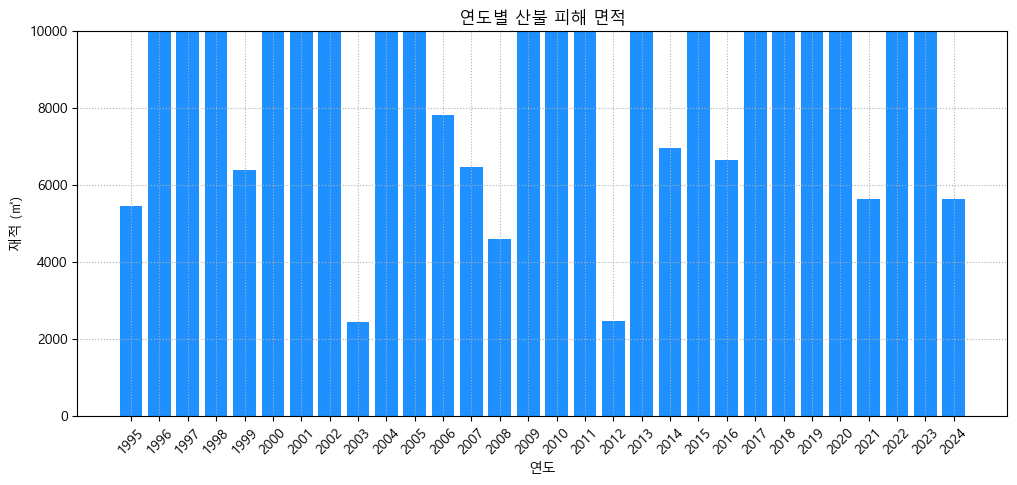

In [66]:
# ----------------------------------------
# 당겨보기
# ----------------------------------------

y = df[('산불피해', '재적 (㎥)')]
plt.bar(df.index, y, color='#1E90FF')

plt.grid(True, ls=':')
plt.xlabel('연도')
plt.ylabel('재적 (㎥)')
plt.title('연도별 산불 피해 면적')
plt.xticks(range(1995,2025,1), rotation=45)
plt.ylim(0, 10000)
pass


### 연도별 산불 피해 금액

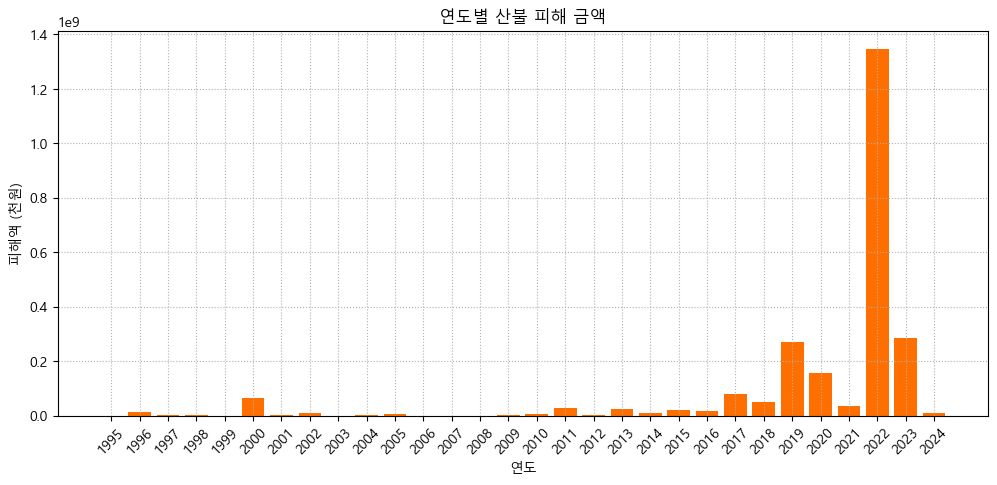

In [67]:
# ----------------------------------------
# 시각화
# ----------------------------------------

y = df[('산불피해', '피해액 (천원)')]
plt.bar(df.index, y, color='#FF6F00')

plt.grid(True, ls=':')
plt.xlabel('연도')
plt.ylabel('피해액 (천원)')
plt.title('연도별 산불 피해 금액')
plt.xticks(range(1995,2025,1), rotation=45)
pass


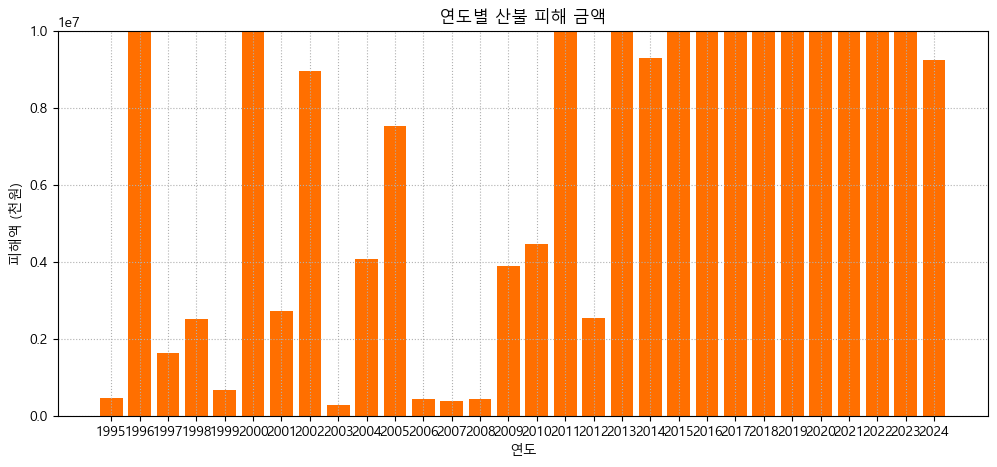

In [68]:
# ----------------------------------------
# 당겨보기
# ----------------------------------------

y = df[('산불피해', '피해액 (천원)')]

plt.bar(df.index, y, color='#FF6F00')
plt.grid(True, ls=':')
plt.xlabel('연도')
plt.ylabel('피해액 (천원)')
plt.title('연도별 산불 피해 금액')
plt.xticks(range(1995,2025,1))
plt.ylim(0,10000000)
pass


### 연도별 인명 피해 현황

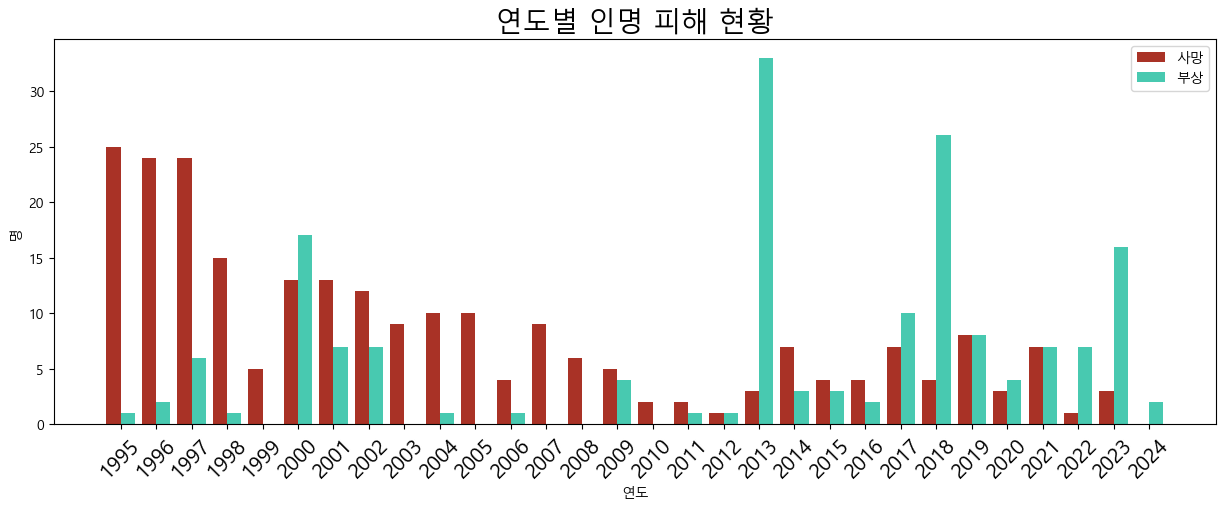

In [69]:
# ----------------------------------------
# 사망, 부상
# ----------------------------------------

x = df.index
y1 = df[('인명피해 (명)', '사망')]
y2 = df[('인명피해 (명)', '부상')]

plt.figure(figsize = (15,5))
plt.bar(x-0.2, y1, label='사망', color='#A93226', width=0.4)
plt.bar(x+0.2, y2, label='부상', color='#48C9B0', width=0.4)
plt.xticks(range(1995,2025))
plt.legend()
plt.xlabel('연도')
plt.ylabel('명')
plt.title('연도별 인명 피해 현황', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
pass

## 산불 원인

In [70]:
# ---------------------------------
# 산불 원인 컬럼만 가져와서 서브셋 생성
# ---------------------------------

cols = df.columns[[1,3,4,5,6,7,8,9]].copy()

df_cause = df.loc[:, cols]
df_cause.head()


원인 (건)                                           
          입산자실화 논밭두렁소각 쓰레기소각 담뱃불실화 성묘객실화 어린이불장난 건축물화재   기타
(시점, 시점)                                                  
1995        312    138     0     0    34     18     0  128
1996        248     73     0     0    38     30     0  138
1997        247    103    41    29    33     10     0   61
1998        104     65    24    13    16     11     0   32
1999        156     57    13    21    20     10     0   38

In [ ]:
# ---------------------------------
# 컬럼명 정리
# ---------------------------------
df_cause.columns = df_cause.columns.get_level_values(1)


In [72]:
# ---------------------------------
# 컬럼별 평균 건수 
#   - 데이터프레임.mean()
#   - 내림차순 정렬
# ---------------------------------

cause_mean = df_cause.mean().sort_values(ascending=False)
cause_mean

입산자실화     187.000000
기타         96.166667
논밭두렁소각     75.566667
쓰레기소각      46.833333
담뱃불실화      33.433333
성묘객실화      23.133333
건축물화재      12.933333
어린이불장난      7.800000
dtype: float64

In [73]:
# ---------------------------------
# 원인별 컬러
# ---------------------------------

wildfire_colors = {
    '입산자실화':   '#A93226',  
    '기타':         '#E59866',  
    '논밭두렁소각': '#F7DC6F', 
    '쓰레기소각':   '#1B4F72', 
    '담뱃불실화':   '#52BE80',  
    '성묘객실화':   '#BA4A00', 
    '건축물화재':   '#5D6D7E', 
    '어린이불장난': '#A569BD'  
}

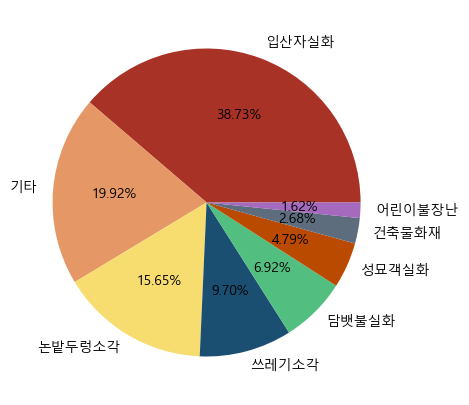

In [74]:
# ---------------------------------
# 시각화 (파이그래프)
# ---------------------------------

values = cause_mean.values
labels = cause_mean.index
colors = [wildfire_colors[label] for label in labels]

plt.pie(values, 
        labels=labels, 
        colors=colors,
        autopct='%.2f%%')
pass

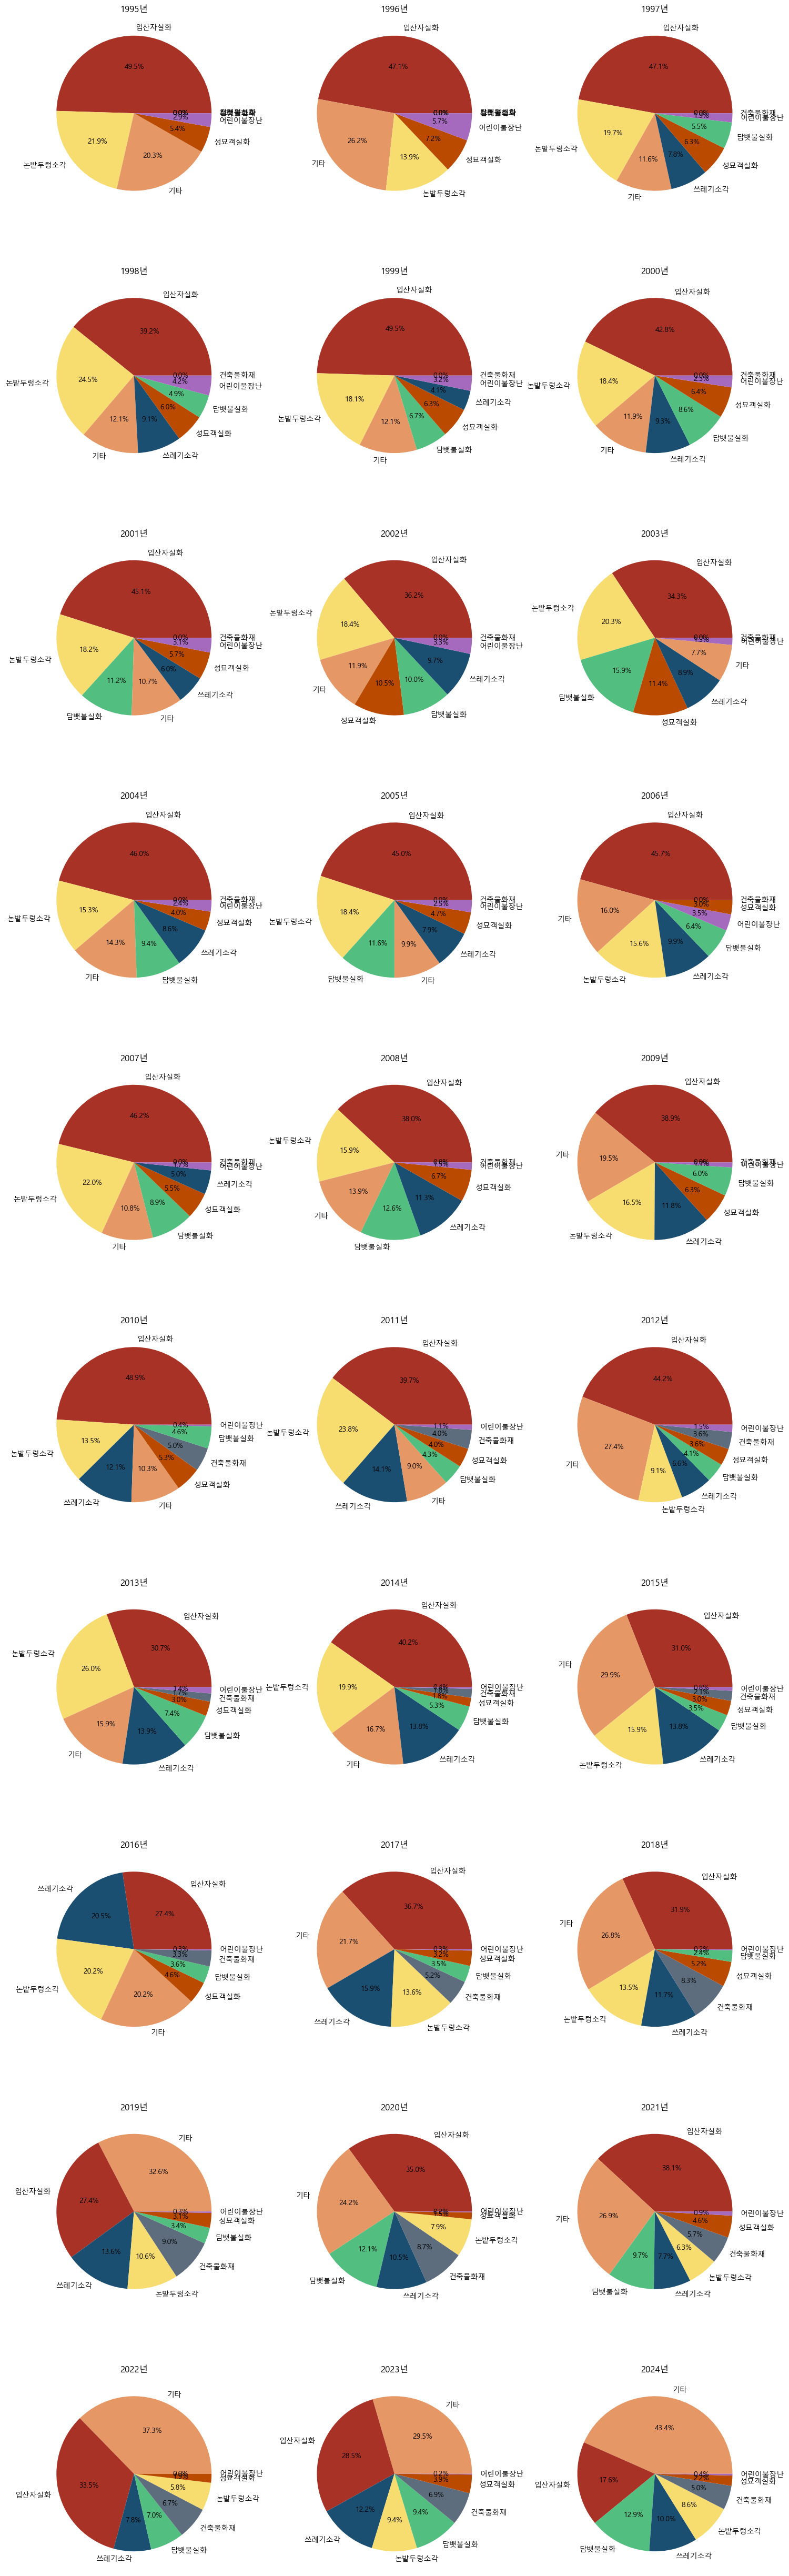

: 

In [ ]:
# ---------------------------------
# 연도별 시각화
# 서브플롯
#   - 10행 3열
# ---------------------------------

fig, axes = plt.subplots(10,3,figsize=(15,50))
flat_axes = axes.flatten() # 반복을 위해 flatten
# i = 0 # axex index

for i, year in enumerate(df_cause.index):
    data = df_cause.loc[year,:].sort_values(ascending=False)
    labels = data.index
    colors = [wildfire_colors[label] for label in labels]
    flat_axes[i].pie(data.values,
                     labels = labels,
                     autopct='%.1f%%',
                     colors=colors)    
    flat_axes[i].set_title(f'{year}년')


plt.tight_layout()